In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [183]:
pwd

'D:\\Lenovo_ThinkPad\\Documents\\Jose\\Course\\Keras Course\\Latihan'

In [184]:
df = pd.read_csv('House_price.csv',header=0)
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [185]:
df.shape

(506, 19)

In [186]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


In [187]:
import seaborn as sns

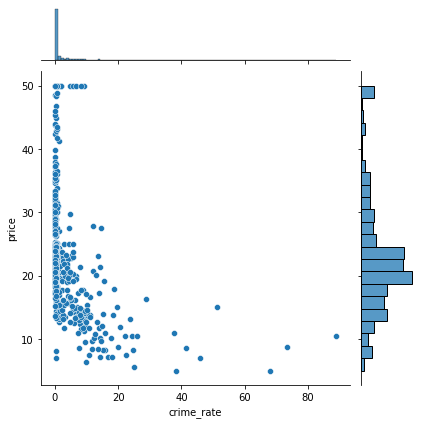

In [188]:
sns.jointplot(data=df,x="crime_rate",y="price")

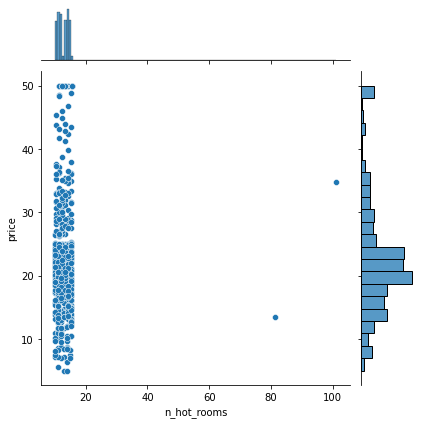

In [189]:
sns.jointplot(data=df,x="n_hot_rooms",y="price")

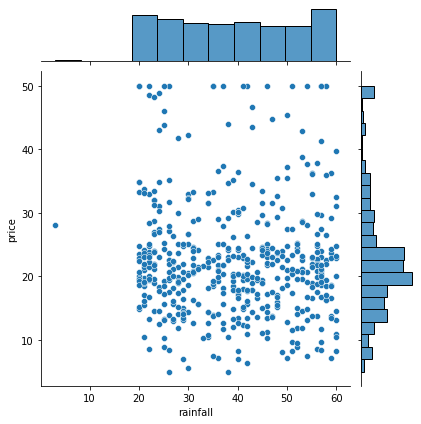

In [190]:
sns.jointplot(data=df,x="rainfall",y="price")

### Categorical Data

<AxesSubplot:xlabel='airport', ylabel='count'>

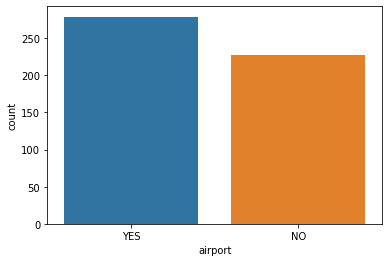

In [191]:
sns.countplot(x="airport",data=df)

<AxesSubplot:xlabel='waterbody', ylabel='count'>

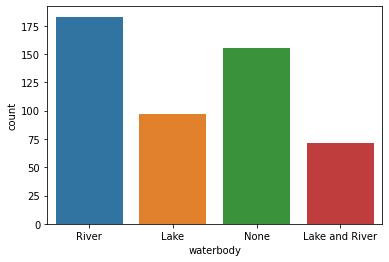

In [192]:
sns.countplot(x="waterbody",data=df)

<AxesSubplot:xlabel='bus_ter', ylabel='count'>

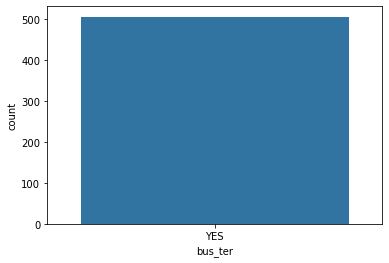

In [193]:
sns.countplot(x="bus_ter",data=df)

Concern :
1. Missing Values in n_hos_beds column
2. Skewness and outliers in crime_rate column
3. Outliers in n_hot_rooms and rainfall
4. Bus_ter has only one values

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

## Outlier Treatment

In [195]:
np.percentile(df.n_hot_rooms,99)

15.39952

In [196]:
upper_limit=np.percentile(df.n_hot_rooms,99)
lower_limit=np.percentile(df.n_hot_rooms,1)

In [197]:
outl =df[(df.n_hot_rooms > 3*upper_limit) | (df.n_hot_rooms < 0.3*lower_limit) ]
outl

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764
423,13.4,7.05042,48.10,0.614,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344


In [198]:
df.n_hot_rooms[(df.n_hot_rooms > 3*upper_limit) | (df.n_hot_rooms < 0.3*lower_limit)]=3*upper_limit

<ipython-input-198-a0b51deb9fe1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.n_hot_rooms[(df.n_hot_rooms > 3*upper_limit) | (df.n_hot_rooms < 0.3*lower_limit)]=3*upper_limit


In [199]:
df.n_hot_rooms.iloc[2],df.n_hot_rooms.iloc[423]

(46.19856, 46.19856)

In [200]:
upper_limit_rain=np.percentile(df.rainfall,99)
lower_limit_rain=np.percentile(df.rainfall,1)

In [201]:
outl_rain = df[(df.rainfall < 0.3*lower_limit_rain)]
outl_rain

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,3,YES,0.044019


In [202]:
df.rainfall[(df.rainfall < 0.3*lower_limit_rain)] = 0.3*lower_limit_rain
df.rainfall.iloc[213]

<ipython-input-202-def1a064d943>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rainfall[(df.rainfall < 0.3*lower_limit_rain)] = 0.3*lower_limit_rain


6

In [203]:
df.rainfall.describe()

count    506.000000
mean      39.187747
std       12.497221
min        6.000000
25%       28.000000
50%       39.000000
75%       50.000000
max       60.000000
Name: rainfall, dtype: float64

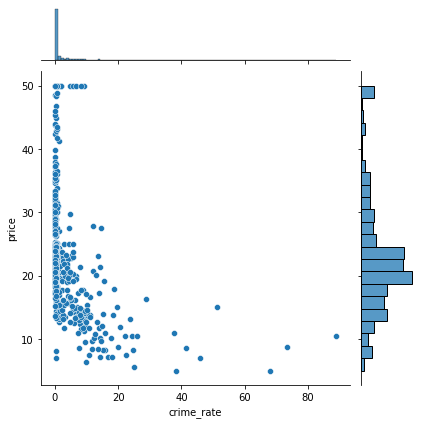

In [204]:
sns.jointplot(x="crime_rate",y="price",data=df)

In [205]:
# Transform Variable
df.crime_rate=np.log(1+df.crime_rate)

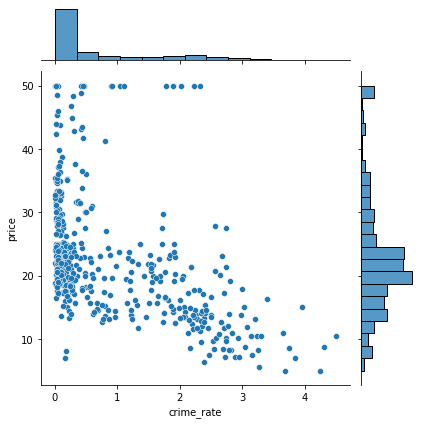

In [206]:
sns.jointplot(x="crime_rate",y="price",data=df)

In [207]:
# Transform Variable using Mean
df['avg_dist']= (df.dist1 + df.dist2 + df.dist3 + df.dist4)/4

In [208]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.813418,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454,3.795104
std,9.182176,1.022731,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,2.688778,12.497221,0.010632,2.105859
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292,1.127500
25%,17.025000,0.078853,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464,2.100625
50%,21.200000,0.228336,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,3.207500
75%,25.000000,1.542674,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397,5.187500
max,50.000000,4.499545,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,12.127500


In [209]:
# Removing dist1, dist2, dist3 , and dist4
df.drop(['dist1','dist2','dist3','dist4'],axis=1,inplace=True)

In [210]:
del df['bus_ter']

## Missing Value Imputation using Mean

In [211]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())

In [212]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,avg_dist
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.480,11.19200,River,23,0.049347,4.0875
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.17280,Lake,42,0.046146,4.9675
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,NO,7.394,46.19856,None,38,0.045764,4.9675
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,YES,9.268,11.26720,Lake,45,0.047151,6.0650
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,NO,8.824,11.28960,Lake,55,0.039474,6.0625


## Variable Transformation

In [213]:
df.waterbody.unique()

array(['River', 'Lake', 'None', 'Lake and River'], dtype=object)

In [214]:
# Dummy Variable : variable that represent categorical value to binary value (0 or 1) with 2 or more distinct categories
df = pd.get_dummies(df)

In [215]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,0,1,0,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,1,0,1,0,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,1,0,0,0,1,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,0,1,1,0,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,1,0,1,0,0,0


In [216]:
# Delete Non-Usable Columns
df.drop(['airport_NO','waterbody_None'],inplace=True,axis=1)

In [217]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,1,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,0,1,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,0,0,0,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,1,1,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,0,1,0,0


In [218]:
df.corr()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
price,1.000000,-0.466527,-0.484754,-0.429300,0.696304,-0.377999,0.505655,-0.740836,0.108880,0.017007,-0.047200,-0.391574,0.249289,0.182867,0.036233,-0.037497,0.071751
crime_rate,-0.466527,1.000000,0.660283,0.707587,-0.288784,0.559591,-0.390052,0.608970,-0.004089,0.056570,0.082151,0.638951,-0.586371,-0.134486,-0.025390,0.009076,-0.060099
resid_area,-0.484754,0.660283,1.000000,0.763651,-0.391676,0.644779,-0.383248,0.603800,0.005799,-0.003761,0.055845,0.707635,-0.708022,-0.115401,-0.026590,0.051649,-0.098976
air_qual,-0.429300,0.707587,0.763651,1.000000,-0.302188,0.731470,-0.188933,0.590879,-0.049553,0.007238,0.091956,0.915544,-0.769247,-0.073903,-0.046393,0.013849,-0.037772
room_num,0.696304,-0.288784,-0.391676,-0.302188,1.000000,-0.240265,0.355501,-0.613808,0.032009,0.014583,-0.064718,-0.282817,0.205241,0.163774,-0.004195,0.010554,0.046251
age,-0.377999,0.559591,0.644779,0.731470,-0.240265,1.000000,-0.261515,0.602339,-0.021012,0.013918,0.074684,0.673850,-0.747906,0.005101,0.003452,-0.004354,-0.088609
teachers,0.505655,-0.390052,-0.383248,-0.188933,0.355501,-0.261515,1.000000,-0.374044,-0.008056,-0.037007,-0.045928,-0.187004,0.232452,0.069437,0.048717,-0.046981,0.094256
poor_prop,-0.740836,0.608970,0.603800,0.590879,-0.613808,0.602339,-0.374044,1.000000,-0.066008,0.017036,0.061444,0.552310,-0.496967,-0.095054,0.003197,0.020620,-0.109004
n_hos_beds,0.108880,-0.004089,0.005799,-0.049553,0.032009,-0.021012,-0.008056,-0.066008,1.000000,-0.003130,0.058596,-0.071272,-0.027871,-0.006365,0.042278,0.059482,-0.074148
n_hot_rooms,0.017007,0.056570,-0.003761,0.007238,0.014583,0.013918,-0.037007,0.017036,-0.003130,1.000000,0.014869,0.023757,-0.020700,-0.055338,0.037925,0.014755,-0.064096


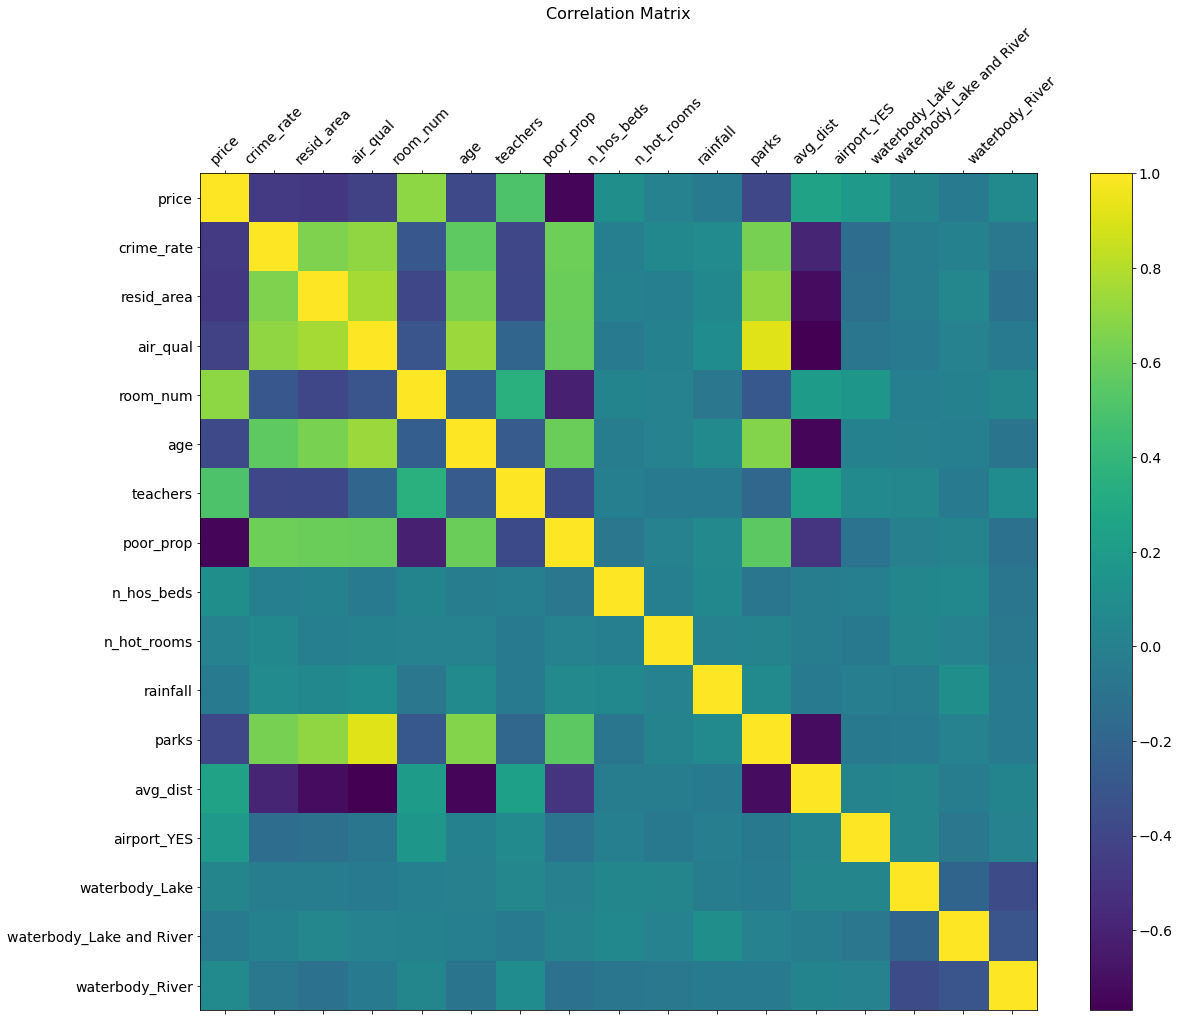

In [219]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [220]:
'''Because Parks and Air Quality have strong correlation, we can remove one of them that have smaller correlation with 
price variable. It's called multicolinearity'''
del df['parks']

In [221]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,1,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,0,1,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,0,0,0,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,1,1,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,0,1,0,0


In [222]:
import statsmodels.api as sn

In [223]:
X = sn.add_constant(df.room_num)

In [224]:
lm = sn.OLS(df.price,X).fit()

In [225]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Fri, 11 Feb 2022   Prob (F-statistic):           1.31e-74
Time:                        16:53:23   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
room_num       9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [226]:
from sklearn.linear_model import LinearRegression

In [227]:
y = df.price

In [228]:
X = df[['room_num']]
X.shape

(506, 1)

In [229]:
lm2 = LinearRegression()

In [230]:
lm2.fit(X,y)

LinearRegression()

In [231]:
print(lm2.intercept_,lm2.coef_)

-34.65924312309721 [9.09966966]


In [232]:
pre = lm2.predict(X)
pre.shape

(506,)

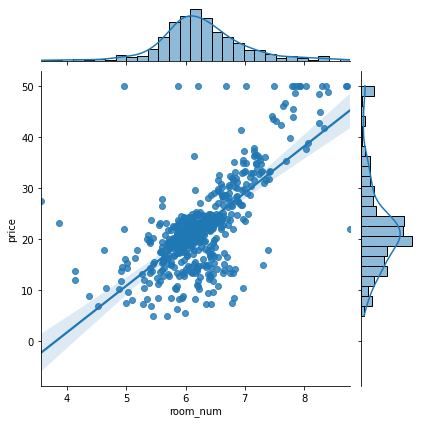

In [233]:
sns.jointplot(x = df.room_num ,y = df.price,kind="reg")

### Creating a New Dataframe that Contains Actual and Predicted Value

In [234]:
df_new = pd.DataFrame({'Actual': y, 'Predicted': pre})
df_new

,Actual,Predicted
0,24.0,25.171085
1,21.6,23.769736
2,34.7,30.721883
3,33.4,29.020245
4,36.2,30.376096
...,...,...
501,22.4,25.334879
502,20.6,21.030735
503,23.9,28.820052
504,22.0,27.163913


### Evaluating The Linear Regression Model using MAE, MSE, and RMSE

In [235]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, pre))
print('Mean Squared Error:', metrics.mean_squared_error(y, pre))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, pre)))

Mean Absolute Error: 4.414325290033629
Mean Squared Error: 43.34859997296325
Root Mean Squared Error: 6.583965368451087


### Build a Multiple Linear Regression Model

In [236]:
X_multi = df.drop("price",axis=1)

In [237]:
X_multi.head()

,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,1,0,0,1
1,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,0,1,0,0
2,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,0,0,0,0
3,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,1,1,0,0
4,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,0,1,0,0


In [238]:
y_multi = df.price

In [239]:
X_multi_cons = sn.add_constant(X_multi)

In [240]:
lm_multi = sn.OLS(y_multi,X_multi_cons).fit()

In [241]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     84.34
Date:                Fri, 11 Feb 2022   Prob (F-statistic):          4.19e-125
Time:                        16:53:25   Log-Likelihood:                -1516.6
No. Observations:                 506   AIC:                             3065.
Df Residuals:                     490   BIC:                             3133.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -6.4986      5.264     -1.235      0.218     -16.842       3.844
crime_rate                   0.0097      0.348      0.028      0.978      -0.674       0.694
resid_area                  -0.0409      0.058     -0.710      0.478      -0.154       0.072
air_qual                   -15.8974      4.004     -3.971      0.000     -23.764      -8.031
room_num                     4.0190      0.427      9.421      0.000       3.181       4.857
age                         -0.0057      0.014     -0.420      0.675      -0.032       0.021
teachers                     1.0070      0.122      8.247      0.000       0.767       1.247
poor_prop                   -0.5773      0.053    -10.955      0.000      -0.681      -0.474
n_hos_beds                   0.3292      0.152      2.163      0.031       0.030       0.628
n_hot_rooms                  0.0919      0.082      1.118      0.264      -0.070       0.253
rainfall                     0.0161      0.018      0.904      0.367      -0.019       0.051
avg_dist                    -1.2186      0.189     -6.450      0.000      -1.590      -0.847
airport_YES                  1.1315      0.454      2.491      0.013       0.239       2.024
waterbody_Lake               0.2641      0.642      0.411      0.681      -0.997       1.525
waterbody_Lake and River    -0.6876      0.714     -0.963      0.336      -2.090       0.715
waterbody_River             -0.2913      0.547     -0.533      0.594      -1.365       0.783
==============================================================================
Omnibus:                      182.596   Durbin-Watson:                   0.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              826.137
Skew:                           1.554   Prob(JB):                    4.04e-180
Kurtosis:                       8.434   Cond. No.                     2.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [242]:
lm3 = LinearRegression()

In [243]:
lm3.fit(X_multi,y_multi)

LinearRegression()

In [244]:
print(lm3.coef_,lm3.intercept_)

[ 9.70998193e-03 -4.08746495e-02 -1.58973999e+01  4.01901676e+00
 -5.71475069e-03  1.00700068e+00 -5.77271243e-01  3.29221139e-01
  9.18675603e-02  1.61185504e-02 -1.21863952e+00  1.13151586e+00
  2.64086064e-01 -6.87555889e-01 -2.91318712e-01] -6.498625198419436


### Train-Test Split

In [245]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size = 0.2,random_state=0)

In [246]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(404, 15) (102, 15) (404,) (102,)


In [247]:
lm_a = LinearRegression()

In [248]:
lm_a.fit(X_train,y_train)

LinearRegression()

In [249]:
y_test_a = lm_a.predict(X_test)
y_test_a

array([27.89994361, 23.03533742, 26.25310034, 12.38736465, 24.30681551,
       20.09861051, 19.21273969, 20.66772403, 18.0432231 , 22.92330253,
       13.65082882, 18.46332803, 16.64741109,  4.95480912, 39.17511413,
       33.11520728, 20.64713649, 36.22755686, 32.22007152, 23.03036921,
       25.76358449, 25.8547788 , 21.33675564, 28.97898921, 21.75346016,
       10.30533977, 18.04655936, 19.53302499, 37.74786082, 22.95354893,
       18.04438371, 16.40111429, 19.85140477, 23.31750153, 30.78539315,
       16.77005238, 11.26741425, 22.80008751, 18.87461641, 14.6811284 ,
       27.63476463, 22.02149745, 24.9307128 , 13.77353423, 27.13963593,
       25.80926697, 20.84419241, 21.28719968, 10.02304592, 25.990463  ,
       21.56080807, 17.89697839, 24.47802128, 32.1929598 , 13.7948406 ,
       21.93839626, 20.51784501, 17.54828781, 20.33906462, 19.80415377,
       19.35865135, 21.61234479, 32.59438751, 32.31178792, 15.89981904,
       33.49345669, 18.02810109, 19.04781134, 21.06100351, 23.31

In [250]:
y_train_a = lm_a.predict(X_train)

In [251]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [252]:
r2_score(y_test,y_test_a)

0.5496468288205671

In [253]:
r2_score(y_train,y_train_a)

0.7564635405911231

In [254]:
df_new_2 = pd.DataFrame({'act':y_test,'pre':y_test_a})
df_new_2

,act,pre
329,22.6,27.899944
371,50.0,23.035337
219,23.0,26.253100
403,8.3,12.387365
78,21.2,24.306816
...,...,...
56,24.7,24.654317
455,14.1,16.564080
60,18.7,15.949771
213,28.1,24.910931


In [255]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_a))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_a))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_a)))

Mean Absolute Error: 4.081351226557548
Mean Squared Error: 36.244944819338194
Root Mean Squared Error: 6.020377464855355


### RIDGE AND LASSO REGRESSION METHOD

In [256]:
from sklearn import preprocessing as pp

In [257]:
scaler = pp.StandardScaler().fit(X_train)

In [258]:
X_train_s = scaler.transform(X_train)

In [259]:
X_test_s=scaler.transform(X_test)

### RIDGE REGRESSION

In [260]:
from sklearn.linear_model import Ridge

In [261]:
lm_r = Ridge(alpha = 0.5)
lm_r.fit(X_train_s,y_train)

Ridge(alpha=0.5)

In [262]:
r2_score(y_test,lm_r.predict(X_test_s))

0.5494318046087935

In [263]:
from sklearn.model_selection import validation_curve

In [264]:
validation_curve?

In [265]:
param_range = np.logspace(-2,8,100) # create 100 values between 10^-2 and 10^8

In [266]:
param_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [267]:
train_score, test_score = validation_curve(Ridge(),X_train_s,y_train,"alpha",param_range,scoring = 'r2')

C:\Users\josec\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=alpha, param_range=[1.00000000e-02 1.26185688e-02 1.59228279e-02 2.00923300e-02
 2.53536449e-02 3.19926714e-02 4.03701726e-02 5.09413801e-02
 6.42807312e-02 8.11130831e-02 1.02353102e-01 1.29154967e-01
 1.62975083e-01 2.05651231e-01 2.59502421e-01 3.27454916e-01
 4.13201240e-01 5.21400829e-01 6.57933225e-01 8.30217568e-01
 1.04761575e+00 1.32194115e+00 1.66810054e+00 2.10490414e+00
 2.65608778e+00 3.35160265e+00 4.22924287e+00 5.33669923e+00
 6.73415066e+00 8.49753436e+00 1.07226722e+01 1.35304777e+01
 1.70735265e+01 2.15443469e+01 2.71858824e+01 3.43046929e+01
 4.32876128e+01 5.46227722e+01 6.89261210e+01 8.69749003e+01
 1.09749877e+02 1.38488637e+02 1.74752840e+02 2.20513074e+02
 2.78255940e+02 3.51119173e+02 4.43062146e+02 5.59081018e+02
 7.05480231e+02 8.90215085e+02 1.12332403e+03 1.41747416e+03
 1.78864953e+03 2.25701972e+03 2.84803587e+03 3.59381366e+03
 4.53487851e+03 5.722

In [268]:
print(train_score)

[[7.49308183e-01 7.62593562e-01 7.52614692e-01 7.82225880e-01
  7.45875174e-01]
 [7.49308182e-01 7.62593561e-01 7.52614692e-01 7.82225879e-01
  7.45875174e-01]
 [7.49308181e-01 7.62593560e-01 7.52614691e-01 7.82225879e-01
  7.45875173e-01]
 [7.49308179e-01 7.62593559e-01 7.52614690e-01 7.82225878e-01
  7.45875172e-01]
 [7.49308177e-01 7.62593557e-01 7.52614688e-01 7.82225876e-01
  7.45875169e-01]
 [7.49308173e-01 7.62593554e-01 7.52614685e-01 7.82225873e-01
  7.45875166e-01]
 [7.49308167e-01 7.62593549e-01 7.52614680e-01 7.82225869e-01
  7.45875161e-01]
 [7.49308157e-01 7.62593541e-01 7.52614673e-01 7.82225863e-01
  7.45875153e-01]
 [7.49308142e-01 7.62593528e-01 7.52614661e-01 7.82225852e-01
  7.45875140e-01]
 [7.49308117e-01 7.62593507e-01 7.52614642e-01 7.82225836e-01
  7.45875120e-01]
 [7.49308077e-01 7.62593474e-01 7.52614611e-01 7.82225810e-01
  7.45875087e-01]
 [7.49308015e-01 7.62593422e-01 7.52614563e-01 7.82225768e-01
  7.45875035e-01]
 [7.49307915e-01 7.62593340e-01 7.526144

In [269]:
train_mean = np.mean(train_score,axis=1)
test_mean = np.mean(test_score,axis=1)

In [270]:
train_mean,test_mean

(array([7.58523498e-01, 7.58523498e-01, 7.58523497e-01, 7.58523495e-01,
        7.58523493e-01, 7.58523490e-01, 7.58523485e-01, 7.58523477e-01,
        7.58523465e-01, 7.58523444e-01, 7.58523412e-01, 7.58523361e-01,
        7.58523279e-01, 7.58523149e-01, 7.58522943e-01, 7.58522616e-01,
        7.58522096e-01, 7.58521272e-01, 7.58519967e-01, 7.58517903e-01,
        7.58514642e-01, 7.58509504e-01, 7.58501426e-01, 7.58488767e-01,
        7.58469009e-01, 7.58438313e-01, 7.58390900e-01, 7.58318167e-01,
        7.58207499e-01, 7.58040697e-01, 7.57791990e-01, 7.57425604e-01,
        7.56892859e-01, 7.56128767e-01, 7.55047956e-01, 7.53539650e-01,
        7.51461316e-01, 7.48630795e-01, 7.44817400e-01, 7.39733711e-01,
        7.33031346e-01, 7.24305121e-01, 7.13109816e-01, 6.98991272e-01,
        6.81529042e-01, 6.60382794e-01, 6.35332488e-01, 6.06305522e-01,
        5.73391865e-01, 5.36855113e-01, 4.97146810e-01, 4.54921329e-01,
        4.11035982e-01, 3.66516907e-01, 3.22481685e-01, 2.800294

In [271]:
max(test_mean) #R-squared value

0.7386139417704551

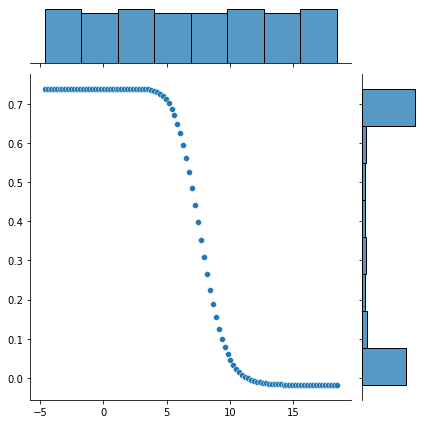

In [272]:
sns.jointplot(x=np.log(param_range),y=test_mean)

In [273]:
np.where(test_mean == max(test_mean))

(array([31], dtype=int64),)

In [274]:
param_range[31]

13.530477745798061

In [275]:
lm_r_best = Ridge(alpha = param_range[31])
lm_r_best.fit(X_train_s,y_train)

Ridge(alpha=13.530477745798061)

In [276]:
r2_score(y_test,lm_r_best.predict(X_test_s))

0.5439016594512955

In [277]:
r2_score(y_train,lm_r_best.predict(X_train_s))

0.7557313242810378

### Lasso Regression

In [278]:
from sklearn.linear_model import Lasso

In [279]:
lm_l = Lasso(alpha = 0.5)
lm_l.fit(X_train_s, y_train)

Lasso(alpha=0.5)

In [280]:
train_score_l, test_score_l = validation_curve(Lasso(),X_train_s,y_train,"alpha",param_range,scoring = 'r2')

C:\Users\josec\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=alpha, param_range=[1.00000000e-02 1.26185688e-02 1.59228279e-02 2.00923300e-02
 2.53536449e-02 3.19926714e-02 4.03701726e-02 5.09413801e-02
 6.42807312e-02 8.11130831e-02 1.02353102e-01 1.29154967e-01
 1.62975083e-01 2.05651231e-01 2.59502421e-01 3.27454916e-01
 4.13201240e-01 5.21400829e-01 6.57933225e-01 8.30217568e-01
 1.04761575e+00 1.32194115e+00 1.66810054e+00 2.10490414e+00
 2.65608778e+00 3.35160265e+00 4.22924287e+00 5.33669923e+00
 6.73415066e+00 8.49753436e+00 1.07226722e+01 1.35304777e+01
 1.70735265e+01 2.15443469e+01 2.71858824e+01 3.43046929e+01
 4.32876128e+01 5.46227722e+01 6.89261210e+01 8.69749003e+01
 1.09749877e+02 1.38488637e+02 1.74752840e+02 2.20513074e+02
 2.78255940e+02 3.51119173e+02 4.43062146e+02 5.59081018e+02
 7.05480231e+02 8.90215085e+02 1.12332403e+03 1.41747416e+03
 1.78864953e+03 2.25701972e+03 2.84803587e+03 3.59381366e+03
 4.53487851e+03 5.722

In [281]:
train_mean_l = np.mean(train_score_l,axis=1)
test_mean_l = np.mean(test_score_l,axis=1)

In [282]:
max(test_mean_l)

0.7384739556073388

In [283]:
np.where(test_mean_l ==max(test_mean_l))

(array([7], dtype=int64),)

In [284]:
param_range[7]

0.0509413801481638

In [285]:
lm_best_l = Lasso(alpha = param_range[7])
lm_best_l.fit(X_train_s, y_train)

Lasso(alpha=0.0509413801481638)

In [286]:
r2_score(y_test,lm_r_best.predict(X_test_s)), r2_score(y_test,lm_best_l.predict(X_test_s))

(0.5439016594512955, 0.5483090467377616)

In [107]:
r2_score(y_train,lm_r_best.predict(X_train_s)), r2_score(y_train,lm_best_l.predict(X_train_s))

(0.7557313242810378, 0.7558788115387505)

Conclusion :

If we have a large dataset, we're recommended to use Ridge Regression Method, ELSE we should use Lasso Regression Method
In this datasets with 506 rows, the better method is Lasso, because it results biggest value of R^2. But that's only happened if we are compare Lasso and Ridge Method on this datasets. The best regression method on this datasets is Multiple Linear Regression.

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     506 non-null    float64
 1   crime_rate                506 non-null    float64
 2   resid_area                506 non-null    float64
 3   air_qual                  506 non-null    float64
 4   room_num                  506 non-null    float64
 5   age                       506 non-null    float64
 6   teachers                  506 non-null    float64
 7   poor_prop                 506 non-null    float64
 8   n_hos_beds                506 non-null    float64
 9   n_hot_rooms               506 non-null    float64
 10  rainfall                  506 non-null    int64  
 11  avg_dist                  506 non-null    float64
 12  airport_YES               506 non-null    uint8  
 13  waterbody_Lake            506 non-null    uint8  
 14  waterbody_

In [109]:
df['Sold'] = np.random.randint(0,2,len(df))

In [110]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River,Sold
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,1,0,0,1,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,0,1,0,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,0,0,0,0,1
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,1,1,0,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,0,1,0,0,0


### Logistic Regression

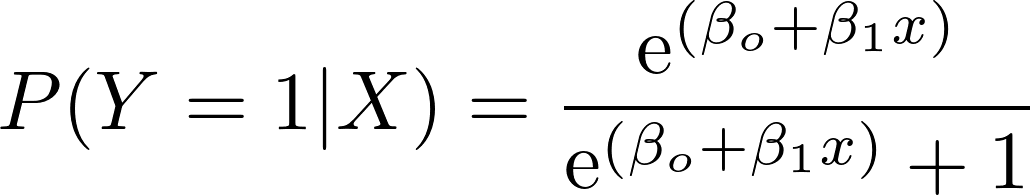

In [111]:
X = df[['price']]
y = df['Sold']
y

0      1
1      0
2      1
3      0
4      0
      ..
501    0
502    0
503    1
504    0
505    1
Name: Sold, Length: 506, dtype: int32

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
clf_lrs = LogisticRegression() # classification using logistic regression

In [114]:
clf_lrs.fit(X,y)

LogisticRegression()

In [115]:
clf_lrs.coef_ # Beta-One

array([[-0.00573424]])

In [116]:
clf_lrs.intercept_ # Beta-Zero

array([0.01831183])

### Another Method of Logistic Regression using Statsmodels

In [117]:
import statsmodels.api as sn

In [118]:
X_const = sn.add_constant(X) # tambahkan konstanta

In [119]:
X_const.head()

,const,price
0,1.0,24.0
1,1.0,21.6
2,1.0,34.7
3,1.0,33.4
4,1.0,36.2


In [120]:
import statsmodels.discrete.discrete_model as sn

In [121]:
Logit = sn.Logit(y,X_const).fit()

Optimization terminated successfully.
         Current function value: 0.691272
         Iterations 4


In [122]:
Logit.summary() # coef of const is beta-zero and coef of price is beta-one

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                  506
Model:                          Logit   Df Residuals:                      504
Method:                           MLE   Df Model:                            1
Date:                Fri, 11 Feb 2022   Pseudo R-squ.:               0.0004968
Time:                        16:40:05   Log-Likelihood:                -349.78
converged:                       True   LL-Null:                       -349.96
Covariance Type:            nonrobust   LLR p-value:                    0.5554
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0183      0.236      0.077      0.938      -0.445       0.482
price         -0.0057      0.010     -0.589      0.556      -0.025       0.013
==============================================================================
"""

In [123]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River,Sold
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,1,0,0,1,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,0,1,0,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,0,0,0,0,1
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,1,1,0,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,0,1,0,0,0


In [124]:
Logit.predict(np.array([[24,0]]))

array([0.6081993])

### Multiple Logistic Regression

In [125]:
X = df.loc[:,df.columns != "Sold"]
y = df['Sold']
X

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,1,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,0,1,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,0,0,0,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,1,1,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.060747,41.93,0.573,6.593,69.1,19.0,9.67,9.348,12.17920,27,2.4775,0,0,1,0
502,20.6,0.044275,41.93,0.573,6.120,76.7,19.0,9.08,6.612,13.16480,20,2.2875,1,0,1,0
503,23.9,0.058986,41.93,0.573,6.976,91.0,19.0,5.64,5.478,12.19120,31,2.1675,0,0,0,0
504,22.0,0.103991,41.93,0.573,6.794,89.3,19.0,6.48,7.940,15.17600,47,2.3900,1,0,0,0


In [126]:
clf_lrs = LogisticRegression() # classification using logistic regression

In [127]:
clf_lrs.fit(X,y)

C:\Users\josec\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [128]:
clf_lrs.coef_ # Beta-One, Beta-two, etc.

array([[-0.02023404, -0.01517519,  0.01130499,  0.0357882 ,  0.25927039,
        -0.00524674, -0.03924306, -0.00770133,  0.02302648,  0.00417721,
        -0.01311072, -0.02518917, -0.20855899, -0.03476596, -0.01711572,
         0.07775237]])

In [129]:
clf_lrs.intercept_ # Beta-Zero

array([0.0109717])

In [135]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [130]:
import statsmodels.api as sn

In [135]:
X_cons = sn.tools.add_constant(X)

In [136]:
logit = sn.Logit(y,X_cons).fit()

Optimization terminated successfully.
         Current function value: 0.680316
         Iterations 4


In [137]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                  506
Model:                          Logit   Df Residuals:                      489
Method:                           MLE   Df Model:                           16
Date:                Fri, 11 Feb 2022   Pseudo R-squ.:                 0.01634
Time:                        16:43:45   Log-Likelihood:                -344.24
converged:                       True   LL-Null:                       -349.96
Covariance Type:            nonrobust   LLR p-value:                    0.7819
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.3778      2.182     -0.173      0.863      -4.654       3.898
price                       -0.0175      0.019     -0.924      0.355      -0.054       0.020
crime_rate                  -0.0721      0.143     -0.502      0.615      -0.353       0.209
resid_area                   0.0043      0.024      0.179      0.858      -0.042       0.051
air_qual                     1.7190      1.675      1.027      0.305      -1.563       5.001
room_num                     0.2726      0.195      1.395      0.163      -0.110       0.656
age                         -0.0065      0.006     -1.159      0.246      -0.017       0.004
teachers                    -0.0573      0.054     -1.065      0.287      -0.163       0.048
poor_prop                   -0.0071      0.024     -0.291      0.771      -0.055       0.041
n_hos_beds                   0.0281      0.063      0.447      0.655      -0.095       0.151
n_hot_rooms                  0.0046      0.034      0.136      0.892      -0.062       0.071
rainfall                    -0.0135      0.007     -1.838      0.066      -0.028       0.001
avg_dist                     0.0013      0.081      0.017      0.987      -0.157       0.160
airport_YES                 -0.2379      0.188     -1.266      0.206      -0.606       0.130
waterbody_Lake              -0.0136      0.264     -0.051      0.959      -0.532       0.504
waterbody_Lake and River    -0.0338      0.294     -0.115      0.908      -0.609       0.542
waterbody_River              0.0749      0.225      0.333      0.739      -0.366       0.516
============================================================================================
"""

### Predicting and Confusion Matrix

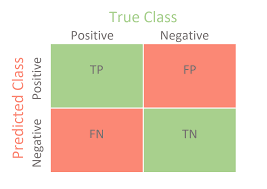

In [138]:
clf_lrs.predict_proba(X)[:,1]

array([0.47560922, 0.45703745, 0.53102435, 0.42673297, 0.42339762,
       0.36857771, 0.38609873, 0.32092258, 0.26056913, 0.36927097,
       0.4474152 , 0.47861875, 0.33292325, 0.45186946, 0.46469713,
       0.5250478 , 0.50592155, 0.41582101, 0.45473469, 0.53834241,
       0.38964937, 0.48537626, 0.42444312, 0.43582828, 0.46109739,
       0.467282  , 0.41094153, 0.50307451, 0.48092703, 0.50858366,
       0.48777286, 0.50195938, 0.56085844, 0.47535481, 0.44642439,
       0.45691521, 0.48925598, 0.53709832, 0.54123461, 0.4469468 ,
       0.55994775, 0.60309468, 0.52127293, 0.44735104, 0.48344173,
       0.57639029, 0.44225445, 0.38472423, 0.39490385, 0.40521465,
       0.4931602 , 0.42205534, 0.50208855, 0.51230444, 0.40075878,
       0.43660066, 0.45987244, 0.37264254, 0.57354725, 0.50101005,
       0.50492404, 0.43294752, 0.37649117, 0.49237529, 0.43100458,
       0.60058912, 0.45581496, 0.51335758, 0.51610782, 0.44302003,
       0.56947386, 0.53489878, 0.63574723, 0.4862659 , 0.59847

In [139]:
y_pred = clf_lrs.predict(X)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,

In [140]:
y_pred_05 = (clf_lrs.predict_proba(X)[:,1] >= 0.5)

In [141]:
y_pred_05

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False,  True, False, False, False, False, False, False, False,
        True, False,  True, False,  True,  True, False, False, False,
       False,  True,  True, False,  True,  True,  True, False, False,
        True, False, False, False, False, False, False,  True,  True,
       False, False, False, False,  True,  True,  True, False, False,
       False, False,  True, False,  True,  True, False,  True,  True,
        True, False,  True,  True,  True, False, False,  True, False,
       False,  True, False,  True, False, False, False,  True, False,
       False,  True, False,  True, False, False,  True, False,  True,
        True,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False,  True,  True, False, False, False, False,  True,
       False, False,

Note : 

- TRUE means that it'll be sold (sold probability > 50%)
- FALSE means it won't be sold (sold probability < 30%)

In [142]:
from sklearn.metrics import confusion_matrix

In [143]:
confusion_matrix(y,y_pred)

array([[184,  83],
       [135, 104]], dtype=int64)

Note : 
- Kolom 1 Baris 1 = bernilai negative di keduanya (aktual dan prediksi) dalam hal ini 0 dan 0
- Kolom 2 Baris 1 = prediksi menyatakan positif, tetapi aktualnya negatif (false positive)
- Kolom 1 Baris 2 = prediksi menyatakan negatif, padahal aktualnya positif (false negative)
- Kolom 2 Baris 2 = prediksi dan aktual menyatakan positif (1)

In [144]:
confusion_matrix(y,y_pred_05)

array([[184,  83],
       [135, 104]], dtype=int64)

In [145]:
from sklearn.metrics import roc_auc_score

In [146]:
roc_auc_score(y,y_pred)

0.5621425101468353

In [147]:
r2_score(y,y_pred)

-0.7286132919624528

In [179]:
accuracy_score(y,y_pred)

0.5691699604743083

### Linear Discriminant Analysis

In [148]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [149]:
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X,y)

LinearDiscriminantAnalysis()

In [150]:
y_pred_lda = clf_lda.predict(X)

In [151]:
confusion_matrix(y,y_pred_lda)

array([[188,  79],
       [134, 105]], dtype=int64)

In [153]:
r2_score(y,y_pred_lda)

-0.688966198110103

In [156]:
accuracy_score(y,y_pred_lda)

0.5790513833992095

In [152]:
X_train

,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
220,0.306079,36.20,0.507,6.951,88.5,22.6,9.71,8.734,11.2136,23,2.8600,0,0,0,1
71,0.147350,40.81,0.413,5.961,17.5,20.8,9.88,10.034,13.1736,46,5.2875,0,0,1,0
240,0.107320,34.93,0.428,6.897,54.3,23.4,11.38,10.240,11.2160,24,6.3350,1,0,0,0
6,0.084608,37.87,0.524,6.012,66.6,24.8,12.43,6.958,12.1832,41,5.5600,1,0,0,1
417,3.293634,48.10,0.679,5.304,89.1,19.8,26.64,8.608,15.0832,60,1.6500,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.249918,37.38,0.493,5.708,74.3,20.4,11.74,6.570,15.1480,25,4.7200,1,0,0,0
192,0.083090,33.44,0.437,7.178,26.3,24.8,2.87,10.528,11.2912,40,6.4775,1,1,0,0
117,0.140614,40.01,0.547,6.021,82.6,22.2,10.30,9.484,15.1536,28,2.7475,0,0,1,0
47,0.206420,36.91,0.448,6.030,85.5,22.1,18.80,5.332,12.1328,44,5.6900,1,0,0,1


### K-Nearest Neighbors

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

In [158]:
scaler = pp.StandardScaler().fit(X_train)

In [159]:
X_train_s = scaler.transform(X_train)

In [160]:
scaler = pp.StandardScaler().fit(X_test)

In [161]:
X_test_s=scaler.transform(X_test)

In [162]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn_1 = KNeighborsClassifier(n_neighbors = 1)
clf_knn_1.fit(X_train_s, y_train)

KNeighborsClassifier(n_neighbors=1)

In [163]:
confusion_matrix(y_test,clf_knn_1.predict(X_test_s))

array([[29, 26],
       [24, 23]], dtype=int64)

In [164]:
from sklearn.metrics import accuracy_score

In [165]:
y.shape, X_test_s.shape

((506,), (102, 16))

In [166]:
accuracy_score(y_test, clf_knn_1.predict(X_test_s))

0.5098039215686274

In [167]:
clf_knn_3 = KNeighborsClassifier(n_neighbors = 3)
clf_knn_3.fit(X_train_s, y_train)

KNeighborsClassifier(n_neighbors=3)

In [168]:
confusion_matrix(y_test,clf_knn_3.predict(X_test_s))

array([[27, 28],
       [31, 16]], dtype=int64)

In [169]:
accuracy_score(y_test, clf_knn_3.predict(X_test_s))

0.4215686274509804

### Using GridSearchCV

In [170]:
from sklearn.model_selection import GridSearchCV

In [171]:
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12]}

In [172]:
grid_search_cv = GridSearchCV(KNeighborsClassifier(),params)

In [173]:
grid_search_cv.fit(X_train_s,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                         12]})

In [174]:
grid_search_cv.best_params_

{'n_neighbors': 2}

In [175]:
optimized_KNN = grid_search_cv.best_estimator_

In [176]:
y_test_pred = optimized_KNN.predict(X_test_s)

In [177]:
confusion_matrix(y_test,y_test_pred)

array([[43, 12],
       [38,  9]], dtype=int64)

In [178]:
accuracy_score(y_test,y_test_pred)

0.5098039215686274